In [1]:
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math


In [2]:
df_csv1 = pd.read_csv('test.csv')
df_csv2 = pd.read_csv('gender_submission.csv')
df_csv3 = pd.read_csv('train.csv')


## Handling test.csv file (1 out of 3)

In [3]:
df_csv1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [4]:
df_csv1

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
df_copy=df_csv1.copy()

df_drops=df_copy.fillna({'Cabin' : 'unkown'})
df_drops=df_drops.fillna({'Age':df_copy['Age'].mean()})
df_drops=df_drops.dropna()
df_drops.info()

<class 'pandas.core.frame.DataFrame'>
Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        417 non-null    object 
 10  Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 39.1+ KB


In [6]:
"""csv1_mean=df_drops['Fare'].mean()
print(f"Average number of Fares : {csv1_mean:.2f}")
csv1_MeanAge=df_drops['Age'].mean()
print(f"Average number of Passengers' Age : {csv1_MeanAge:.2f}")
csv1_Mode=df_drops['Fare'].max()
print(f"The max value of Fares found : {csv1_Mode:.2f}")
csv1_Mode=df_drops['Fare'].min()
print(f"The least value of Fares found : {csv1_Mode:.2f}")
df_drops['Age'].mode()
"""


'csv1_mean=df_drops[\'Fare\'].mean()\nprint(f"Average number of Fares : {csv1_mean:.2f}")\ncsv1_MeanAge=df_drops[\'Age\'].mean()\nprint(f"Average number of Passengers\' Age : {csv1_MeanAge:.2f}")\ncsv1_Mode=df_drops[\'Fare\'].max()\nprint(f"The max value of Fares found : {csv1_Mode:.2f}")\ncsv1_Mode=df_drops[\'Fare\'].min()\nprint(f"The least value of Fares found : {csv1_Mode:.2f}")\ndf_drops[\'Age\'].mode()\n'

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


([<matplotlib.patches.Wedge at 0x2b475c6eb50>,
 [Text(-0.5367979138863777, 1.1839966214678288, 'Male'),
  Text(0.4542136194423197, -1.0018432950881628, 'Female')])

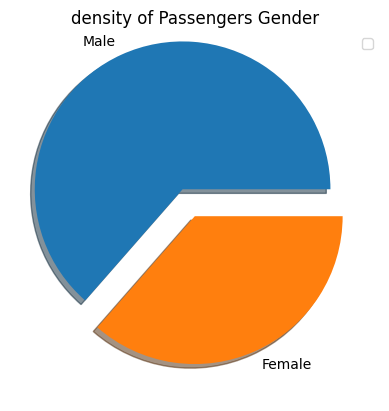

In [7]:
sizes = 10 * np.random.randint(100, size=(100))
#plt.plot(df_drops['Age'])
malec=0
femac=0
for i in df_drops['Sex']:
    if i== "male":
        malec+=1
    else:
        femac+=1

sizes_pie=[malec,femac]
labels=['Male','Female']
ex=[0.2,0]
plt.title("density of Passengers Gender")
plt.legend()
plt.pie(sizes_pie,labels=labels,explode=ex,shadow=True)

([<matplotlib.patches.Wedge at 0x2b475cfd8d0>,
 [Text(0.9245634054478232, 0.5959719031185314, '+40'),
  Text(-1.1767170614790479, -0.7585096948781306, '-40')])

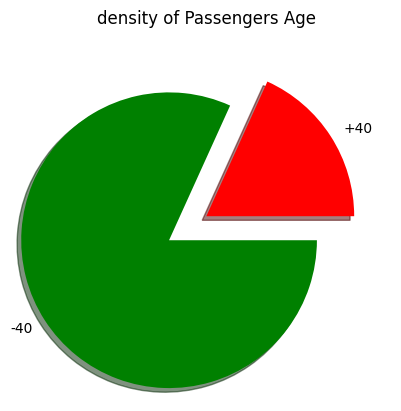

In [8]:
above_40=df_drops['Age']
counter=0
less=0
for i in above_40:
    if i >40:
        counter+=1
    else:
        less+=1
plt.title("density of Passengers Age")
labels=[counter,less]
c=['red','green']
myex=[0,0.3]
titless=['+40','-40']
plt.pie(labels, labels=titless,colors=c,explode=myex,shadow=True)


([<matplotlib.patches.Wedge at 0x2b475aa7b90>,
 [Text(0.9049740869182279, 0.9332855415179858, 'First\n 26%'),
  Text(-0.8758044293343696, 0.9607115079764057, 'Second\n 23%'),
  Text(-0.08002905172611882, -1.2975343351448616, 'Third\n 53%')])

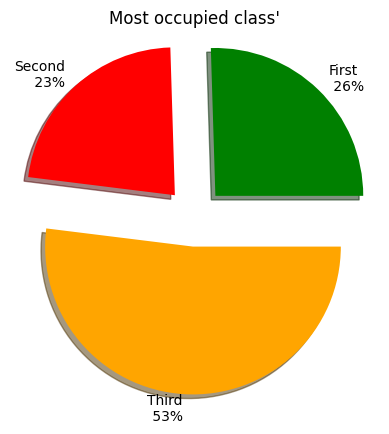

In [9]:
FirstClass=math.ceil((df_drops['Pclass']==1).mean()*100)
SecondClass=math.ceil((df_drops['Pclass']==2).mean().mean()*100)
ThirdClass=math.ceil((df_drops['Pclass']==3).mean().mean()*100)

study=[FirstClass,SecondClass,ThirdClass]
labels=[f'First\n {FirstClass}%',f'Second\n {SecondClass}%',f'Third\n {ThirdClass}%']
colors=['green','red','orange']
explode=[0.2,0.2,0.2]
plt.title("Most occupied class'")
plt.pie(study,labels=labels,colors=colors,shadow=True,explode=explode)


Text(0, 0.5, 'Number of Passengers')

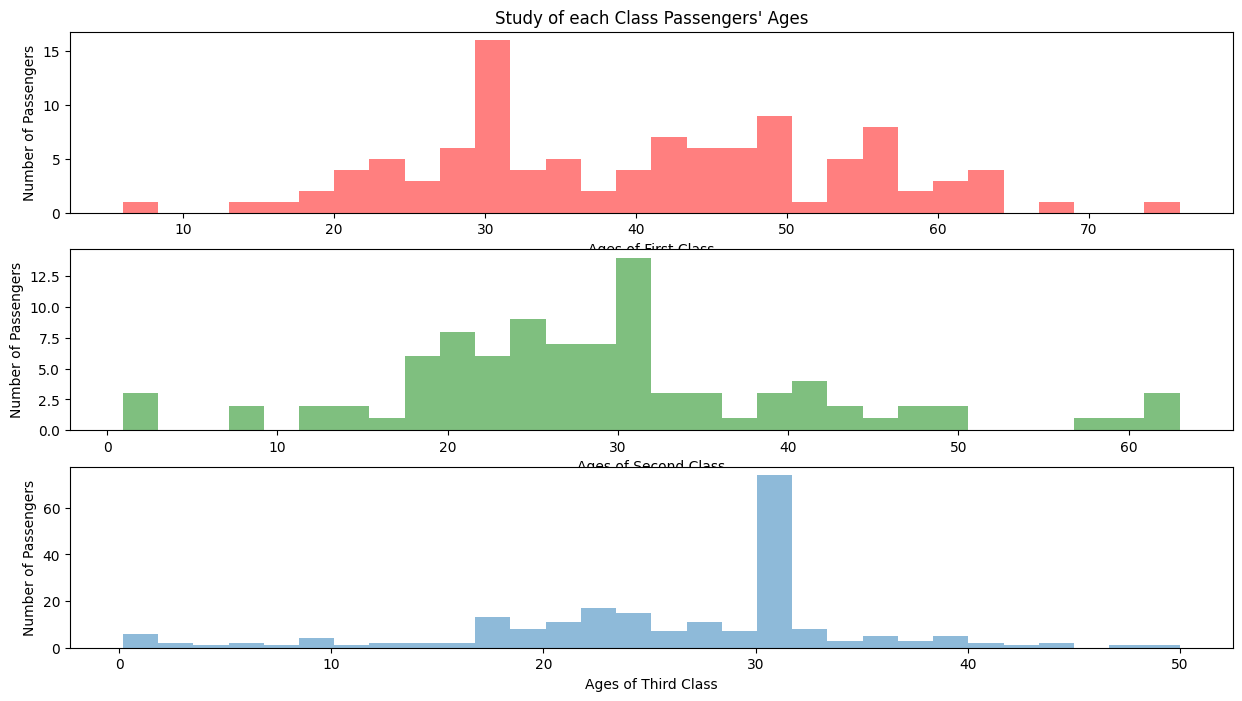

In [11]:
FirstAge=[]
SecondAge=[]
ThirdAge=[]
for _ in range(len(df_drops)):
    if df_drops.iloc[_]['Pclass'] ==1:
        FirstAge.append(df_drops.iloc[_]['Age'])
    elif df_drops.iloc[_]['Pclass']==2:
        SecondAge.append(df_drops.iloc[_]['Age'])
    else:
        ThirdAge.append(df_drops.iloc[_]['Age'])

plt.figure(figsize=(15,8))

plt.subplot(3,1,1)
plt.title("Study of each Class Passengers' Ages")
plt.xlabel("Ages of First Class")
plt.ylabel('Number of Passengers')
plt.hist(FirstAge,bins=30,color='red',alpha=0.5)
plt.subplot(3,1,2)
plt.hist(SecondAge,bins=30,color='green',alpha=0.5)
plt.xlabel("Ages of Second Class")
plt.ylabel('Number of Passengers')
plt.subplot(3,1,3)
plt.hist(ThirdAge,bins=30,alpha=0.5)
plt.xlabel("Ages of Third Class")
plt.ylabel('Number of Passengers')



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


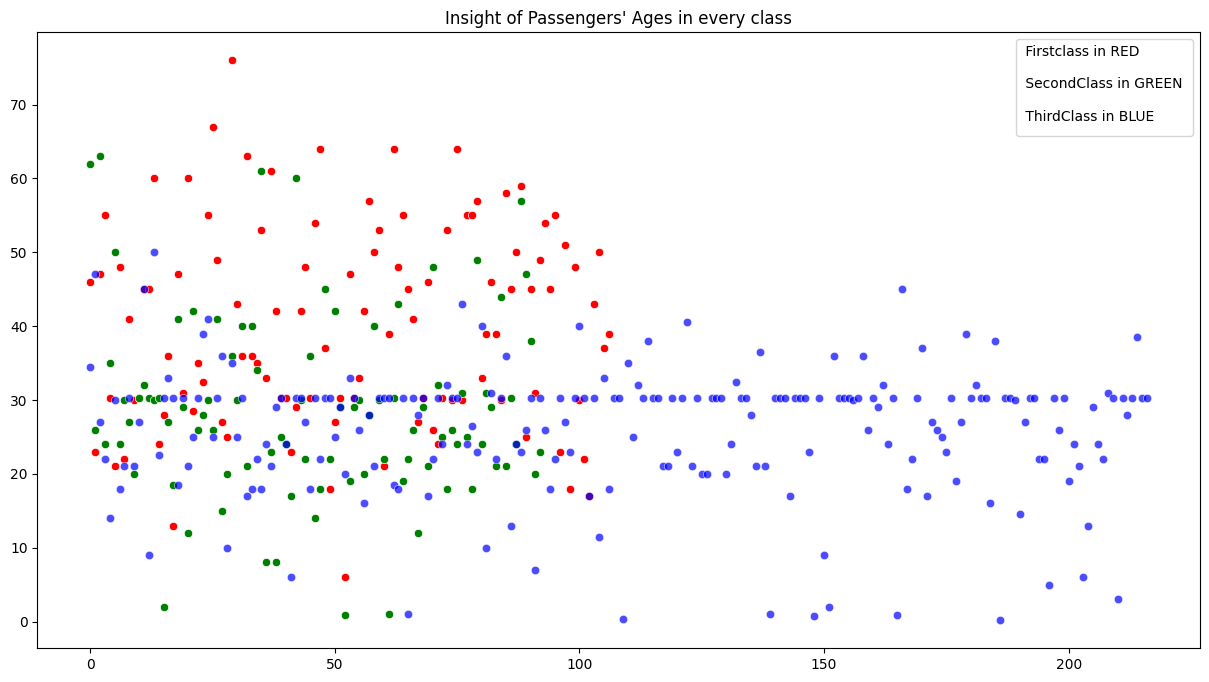

In [12]:
plt.figure(figsize=(15,8))
plt.title("Insight of Passengers' Ages in every class")
sns.scatterplot(FirstAge,c='r')
sns.scatterplot(SecondAge,c='green')
sns.scatterplot(ThirdAge,c='blue',alpha=0.7)
plt.legend(title=' Firstclass in RED \n\n SecondClass in GREEN \n\n ThirdClass in BLUE')



## Handling Gender_submission.csv file (2 out of 3)

In [13]:
df_D=df_csv2.copy()
df_D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [14]:
survive=0
s=[]
d=[]
death=0
try:
    for i in df_D['Survived']:
        if df_D.iloc[i]['Survived']==1:
            survive+=1
            s.append(1)
        else:
            death+=1
            d.append(1)
except:
    print("Error '0 or 1' ")

print(survive)
print(death)
#surving RAte
Survive_Rate=df_D['Survived'].mean()*100



152
266


([<matplotlib.patches.Wedge at 0x2b4781df610>,
 [Text(0.5400394766422113, 1.1825216123471092, 'Surviving\n 37%'),
  Text(-0.45695648023571767, -1.0005952104475537, 'death\n 64%')])

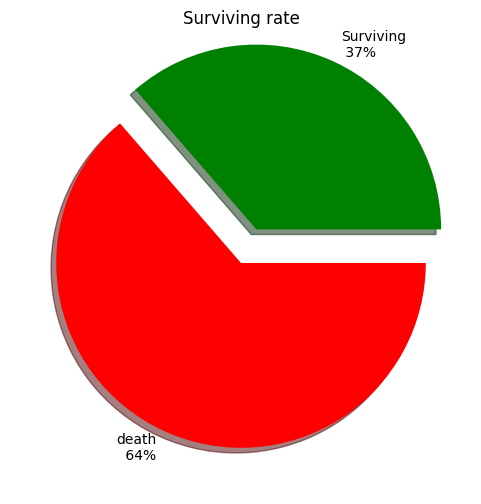

In [15]:
rate=[survive,death]
labels=[f'Surviving\n {math.ceil(Survive_Rate)}%',f'death\n {math.ceil(100-Survive_Rate)}%']
explode=[0.2,0]
plt.figure(figsize=(15,6))
plt.title("Surviving rate")
colors=['green','red']
plt.pie(rate,labels=labels,shadow=True,explode=explode,colors=colors)

(array([266.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 152.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

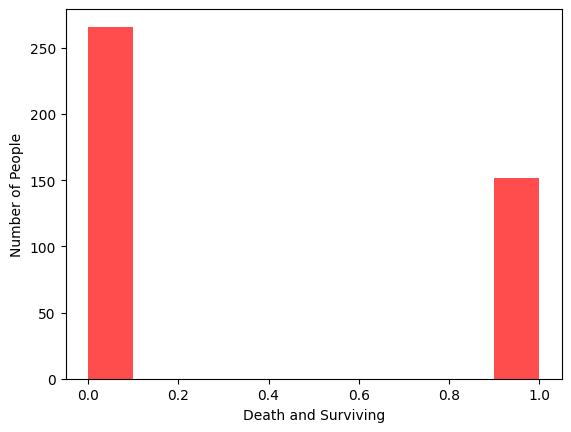

In [16]:
graphing=df_D['Survived']
plt.ylabel('Number of People')
plt.xlabel('Death and Surviving')
plt.hist(graphing,bins=10,alpha=.7,color='r')

## Insights
of both test.csv file and gender_submission.csv file

- Most passengers are young adults.

    Where the Number of Passengers who are younger than 40 years old were a total of -76- Passenger.

    On the other hand The Number of Passengers who were older than 40 years old was -341- Passengers.
    Where mostly are in their 30s.
    
        Having almost -82%- of Passengers are young adults




- Third Class Plan was the most Occupied Plan.

    Most occupied Class ,Ordered Descendingly was:

    1- Third CLass at -217- total Passengers.

    2- First Class at -107- total Passengers.

    3- Second Class at -93- total Passengers.
    
        Resulting to, MORE THAN Half of the Passengers Chose the Third Class Plan at -52%- Rate 




- A Passenger is more likely to be a Male . 


    Total number of Males were at -265- where the number of Females were at -152-

        Where a Passenger is More likely to be a male at a -64%- rate


* Number of Survivors just surpassed the 150 mark at -152- of total Survivors


    resulting in a Percentage of -36%- in Surviving

    
* While the Number of Deaths where at -266- total deaths


        Making it at -64%- mark of Deaths Perentages 

## Handling Train.csv file (3 out of 3)

In [17]:
df_copy3=df_csv3.copy()
df_copy3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
df_3=df_copy3.fillna({'Age':df_copy3['Age'].mean()})
df_3=df_3.fillna({'Cabin':'Unkown'})
df_3=df_3.dropna()
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


([<matplotlib.patches.Wedge at 0x2b4787b3bd0>,
 [Text(1.0641898980729034, 0.7466591329646906, ' Young\n 25% '),
  Text(-0.900468375292457, -0.6317884971239688, ' Old\n 75% ')])

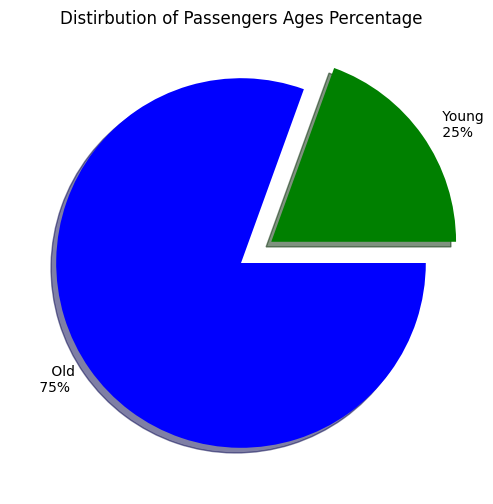

In [19]:
young=0
for i in range(0,len(df_3)):
    if df_3.iloc[i]['Age']>35:
        young+=1
old=len(df_3['Age']-young)
youngs=math.ceil(young/len(df_3)*100)
olds=100-youngs
plt.figure(figsize=(15,6))
pie=[young,old]
plt.title("Distirbution of Passengers Ages Percentage")
explode=[0.2,0]
color=['green','blue']
labels=[f' Young\n {youngs}% ',f' Old\n {olds}% ']
plt.pie(pie,shadow=True,explode=explode,colors=color,labels=labels)

    


<Axes: title={'center': 'Scatterplot for the Young Aged Passengers'}>

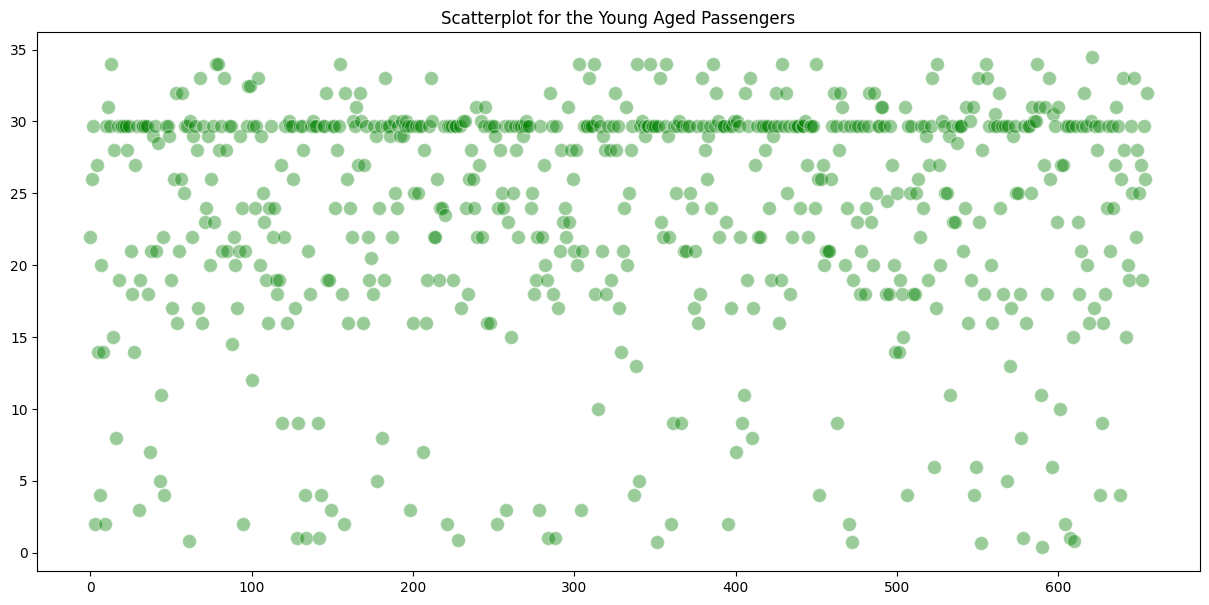

In [20]:
youngList=[]
oldList=[]
for _ in range(len(df_3)):
    if df_3.iloc[_]['Age']<35:
        youngList.append(df_3.iloc[_]['Age'])
    else:
        oldList.append(df_3.iloc[_]['Age'])


plt.figure(figsize=(15,7))
plt.title('Scatterplot for the Young Aged Passengers')
sns.scatterplot(youngList,s=100,color='green',alpha=.4)

{'bodies': [<matplotlib.collections.PolyCollection at 0x2b47832c8d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x2b47832e750>,
 'cmins': <matplotlib.collections.LineCollection at 0x2b47834c2d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x2b4782ec1d0>}

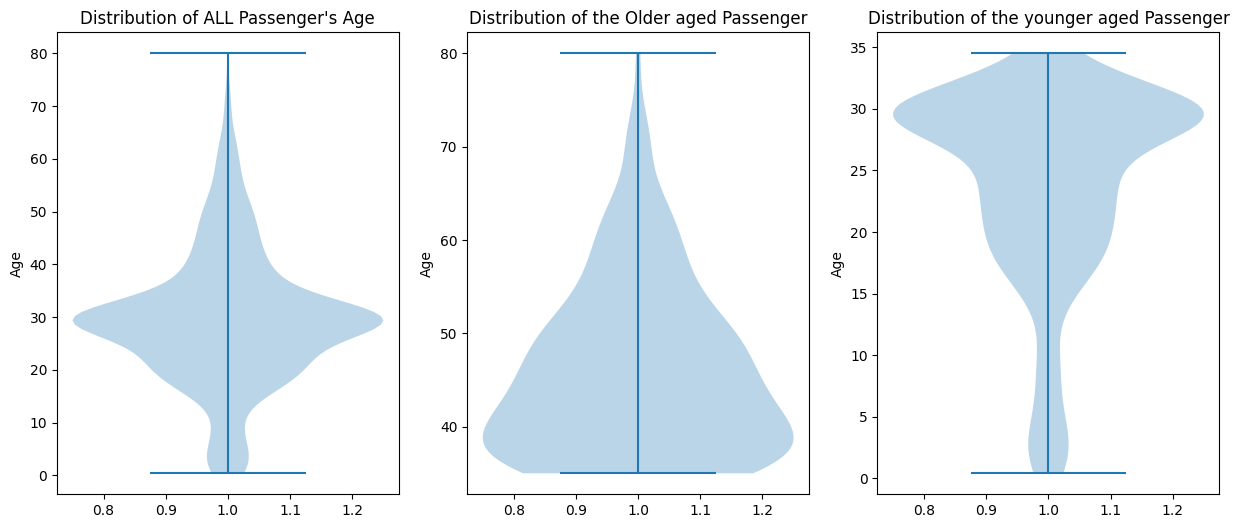

In [21]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
plt.title("Distribution of ALL Passenger's Age")
plt.ylabel('Age')
plt.violinplot(df_3['Age'])
plt.subplot(1,3,2)
plt.title('Distribution of the Older aged Passenger')
plt.ylabel('Age')
plt.violinplot(oldList)
plt.subplot(1,3,3)
plt.title('Distribution of the younger aged Passenger')
plt.ylabel('Age')
plt.violinplot(youngList)



<Axes: title={'center': 'Scatterplot for The Prices of Fares'}, xlabel='Passengers ID', ylabel='Amount of Fare'>

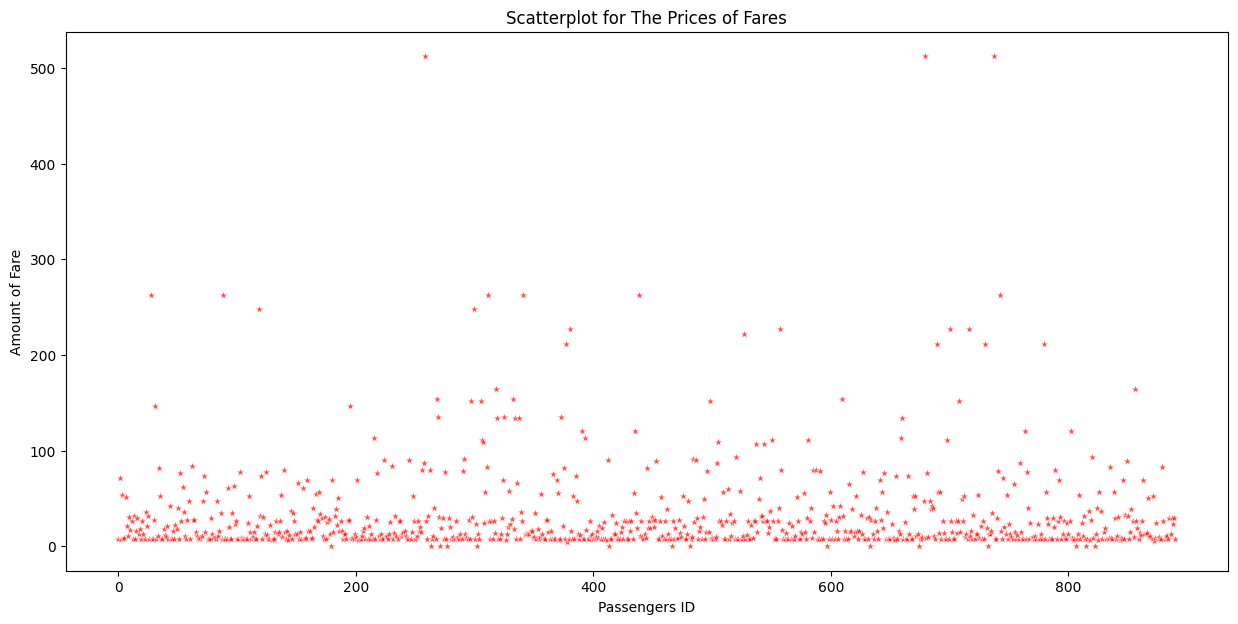

In [22]:
plt.figure(figsize=(15,7))
plt.title('Scatterplot for The Prices of Fares')
plt.xlabel('Passengers ID')
plt.ylabel('Amount of Fare')
sns.scatterplot(df_3['Fare'],alpha=0.7,c='r',marker='*')

(array([732., 104.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

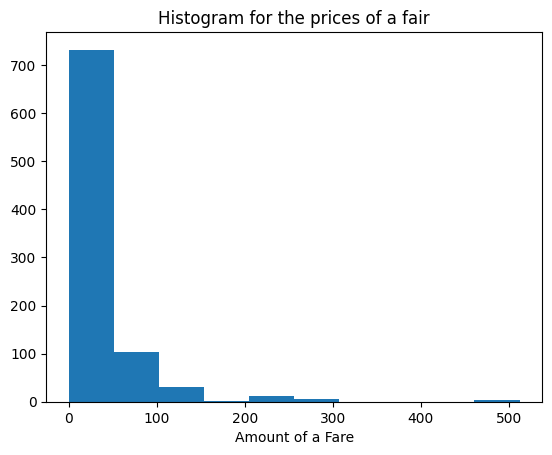

In [23]:
plt.title('Histogram for the prices of a fair')
plt.xlabel('Amount of a Fare')
plt.hist(df_3['Fare'],bins=10)

In [24]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        889 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


In [28]:
"""exp=[]
less=[]
for _ in range(len(df_3)):
    if df_3.iloc[_]['Fare']>50:
        exp.append(df_3.iloc[_]['Fare'])
    else:
        less.append(df_3.iloc[_]['Fare'])"""
"""********************************"""
"""********************************"""
"""********************************"""
"""********************************"""
"""********************************"""
"""********************************"""
"""********************************"""
"""********************************"""














'********************************'

## Insights
of both test.csv file and gender_submission.csv file

- Most passengers are young adults.

    Where the Number of Passengers who are younger than 40 years old were a total of -76- Passenger.

    On the other hand The Number of Passengers who were older than 40 years old was -341- Passengers.
    Where mostly are in their 30s.
    
        Having almost -82%- of Passengers are young adults




- Third Class Plan was the most Occupied Plan.

    Most occupied Class ,Ordered Descendingly was:

    1- Third CLass at -217- total Passengers.

    2- First Class at -107- total Passengers.

    3- Second Class at -93- total Passengers.
    
        Resulting in, MORE THAN Half of the Passengers Chose the Third Class Plan at -52%- Rate 




- A Passenger is more likely to be a Male . 


    Total number of Males were at -265- where the number of Females were at -152-

        Where a Passenger is More likely to be a male at a -64%- rate


* Number of Survivors just surpassed the 150 mark at -152- of total Survivors


    resulting in a Percentage of -36%- in Surviving

    
* While the Number of Deaths where at -266- total deaths


         Making it at -64%- mark of Deaths Perentages 


from train.csv file
* The Train is used Mostly by old adults
    
        Where a Percentage of Only -25%- is Occupied by rather younger age, Having -75%- Rate of Older Passengers



*   Stable Fare prices.
    
        A Fare is most likely to be Priced at -8,05$-  

